# We'll start at 2:10ish PM 

Waiting for others to join the call :)

https://www.youtube.com/watch?v=LOw4G_Y6Ojk&ab_channel=bbrromina

<center><img src='img/cdy.png' style='width:500px; float: left; margin: 0px 30px 15px 0px'></center>

# Text pre-processing and Word Clouds
## Class 18 - Data Science Curriculum 

<br>

#### Women Building Change scholarship program 2023 🇧🇮
April 24, 2023





# ⏪ Recap last class

- what is nlp?

# 🚀 Today's agenda

- Text pre-processing
- Word Cloud

<center><img src='img/pipeline.png' style='width:1500px; margin: 0px 30px 15px 0px'></center>

# Let's get some data for today's class using Twitter

In [108]:
import pandas as pd 
import tweepy

keys = pd.read_csv("../Class 16 - Twitter/keys_demo.csv", header=None)
keys = dict(zip(keys[0],keys[1]))

auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

tweets = tweepy.Cursor(api.search_tweets,
                       q=[''],
                       lang='fr',
                       geocode=f'3.3614,29.3599,100km',
                       tweet_mode='extended',
                       include_rts=False).items(300)

In [109]:
t = [tweet for tweet in tweets]
t_processed = []

for tweet in t:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Burundi")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t_processed.append(temp)
    
data = pd.DataFrame(t_processed)
data.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']

Unexpected parameter: include_rts
Unexpected parameter: include_rts
Unexpected parameter: include_rts
Unexpected parameter: include_rts
Unexpected parameter: include_rts
Unexpected parameter: include_rts
Unexpected parameter: include_rts
Unexpected parameter: include_rts
Unexpected parameter: include_rts
Unexpected parameter: include_rts
Unexpected parameter: include_rts
Unexpected parameter: include_rts


In [110]:
data.head(10)

,tweet,date,city,user_location,id,link
0,@Pliam_ Eeeeh!....naye banange😂,2023-04-24 10:48:27+00:00,Burundi,"Gulu, UGanda",1650451630695874561,https://twitter.com/i/web/status/1650451630695...
1,"@aerynclairine • humorous, adaptable, affable.",2023-04-24 07:36:28+00:00,Burundi,abim,1650403318412492800,https://twitter.com/i/web/status/1650403318412...
2,"@weevks • humorous, adaptable, affable.",2023-04-24 07:36:10+00:00,Burundi,abim,1650403240603947009,https://twitter.com/i/web/status/1650403240603...
3,"@loopscecel • humorous, adaptable, affable.",2023-04-24 07:36:00+00:00,Burundi,abim,1650403200321871872,https://twitter.com/i/web/status/1650403200321...
4,"@cabpella • humorous, adaptable, affable.",2023-04-24 07:35:51+00:00,Burundi,abim,1650403162837381122,https://twitter.com/i/web/status/1650403162837...
5,"@desqgn • humorous, adaptable, affable.",2023-04-24 07:35:04+00:00,Burundi,abim,1650402966778818562,https://twitter.com/i/web/status/1650402966778...
6,"@prttyeleanor • humorous, adaptable, affable.",2023-04-24 07:34:55+00:00,Burundi,abim,1650402925502672897,https://twitter.com/i/web/status/1650402925502...
7,"@jevdai • humorous, adaptable, affable.",2023-04-24 07:34:42+00:00,Burundi,abim,1650402873023565824,https://twitter.com/i/web/status/1650402873023...
8,"@elodienoaa • humorous, adaptable, affable.",2023-04-24 07:33:54+00:00,Burundi,abim,1650402671545946116,https://twitter.com/i/web/status/1650402671545...
9,"@candysluvv • humorous, adaptable, affable.",2023-04-24 07:33:41+00:00,Burundi,abim,1650402615220670469,https://twitter.com/i/web/status/1650402615220...


In [111]:
data.to_csv("tweets_april24_fr.csv", index=False)

# Feature Engineering for NLP

1. Lowercase
2. Remove punctuation and stop-words
3. Tokenize
4. Stemming
5. Lemma 

# 1. Lowercase

In [39]:
text = "Hi, how are you? This is my number: 777-777-777"
text = text.lower()
text

'hi, how are you? this is my number: 777-777-777'

In [40]:
data['pp'] = data['tweet'].apply(lambda row: row.lower())

In [41]:
data.head()

,tweet,date,city,user_location,id,link,pp
0,@Oluwa_Flavor Amen 👏,2023-04-24 05:38:14+00:00,Burundi,"Arua, Uganda",1650373563088617474,https://twitter.com/i/web/status/1650373563088...,@oluwa_flavor amen 👏
1,Happy Birthday Mate\n@AseaOliver https://t.co/...,2023-04-24 05:38:02+00:00,Burundi,"Arua, Uganda",1650373514275307523,https://twitter.com/i/web/status/1650373514275...,happy birthday mate\n@aseaoliver https://t.co/...
2,@JaneTibaijuka You well come please.,2023-04-24 05:37:56+00:00,Burundi,"Gulu, Uganda",1650373485418479616,https://twitter.com/i/web/status/1650373485418...,@janetibaijuka you well come please.
3,@IvanOkuda @evans_najuna I can testify to that,2023-04-24 05:37:33+00:00,Burundi,kampala,1650373390996209664,https://twitter.com/i/web/status/1650373390996...,@ivanokuda @evans_najuna i can testify to that
4,@KakwenzaRukira And a fool 😂😂😂,2023-04-24 05:37:02+00:00,Burundi,"Gulu, Uganda",1650373261262458881,https://twitter.com/i/web/status/1650373261262...,@kakwenzarukira and a fool 😂😂😂


# 2. Remove punctuation 

In [42]:
import re

text = re.sub(r"[\W\d]", " ", text)
text

'hi  how are you  this is my number             '

In [43]:
data['pp'] = data['pp'].apply(lambda row: re.sub(r"[\W\d]", " ", row))

In [44]:
data.head()

,tweet,date,city,user_location,id,link,pp
0,@Oluwa_Flavor Amen 👏,2023-04-24 05:38:14+00:00,Burundi,"Arua, Uganda",1650373563088617474,https://twitter.com/i/web/status/1650373563088...,oluwa_flavor amen
1,Happy Birthday Mate\n@AseaOliver https://t.co/...,2023-04-24 05:38:02+00:00,Burundi,"Arua, Uganda",1650373514275307523,https://twitter.com/i/web/status/1650373514275...,happy birthday mate aseaoliver https t co h...
2,@JaneTibaijuka You well come please.,2023-04-24 05:37:56+00:00,Burundi,"Gulu, Uganda",1650373485418479616,https://twitter.com/i/web/status/1650373485418...,janetibaijuka you well come please
3,@IvanOkuda @evans_najuna I can testify to that,2023-04-24 05:37:33+00:00,Burundi,kampala,1650373390996209664,https://twitter.com/i/web/status/1650373390996...,ivanokuda evans_najuna i can testify to that
4,@KakwenzaRukira And a fool 😂😂😂,2023-04-24 05:37:02+00:00,Burundi,"Gulu, Uganda",1650373261262458881,https://twitter.com/i/web/status/1650373261262...,kakwenzarukira and a fool


# 3. Tokenize

Tokenization is the process of converting a sequence of characters into a sequence of tokens (lexical components).

In [45]:
text = text.split()
text

['hi', 'how', 'are', 'you', 'this', 'is', 'my', 'number']

In [46]:
data['pp'] = data['pp'].apply(lambda row: row.split())

# 4. Remove stop words

In [47]:
! pip install nltk

In [79]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw = stopwords.words('english')
sw.append('https')
sw.append('co')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vivianamarquez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
text = [word for word in text if word not in sw]
text

['hi', 'number']

In [81]:
data['pp'] = data['pp'].apply(lambda text: [word for word in text if word not in sw])

In [82]:
data.head()

,tweet,date,city,user_location,id,link,pp,pp_op,pp_op2
0,@Oluwa_Flavor Amen 👏,2023-04-24 05:38:14+00:00,Burundi,"Arua, Uganda",1650373563088617474,https://twitter.com/i/web/status/1650373563088...,"[oluwa_flavor, amen]","[oluwa_flavor, amen]","[oluwa_flavor, amen]"
1,Happy Birthday Mate\n@AseaOliver https://t.co/...,2023-04-24 05:38:02+00:00,Burundi,"Arua, Uganda",1650373514275307523,https://twitter.com/i/web/status/1650373514275...,"[happy, birthday, mate, aseaoliver, hshiaavkoe]","[happi, birthday, mate, aseaoliv, https, co, h...","[happy, birthday, mate, aseaoliver, https, co,..."
2,@JaneTibaijuka You well come please.,2023-04-24 05:37:56+00:00,Burundi,"Gulu, Uganda",1650373485418479616,https://twitter.com/i/web/status/1650373485418...,"[janetibaijuka, well, come, please]","[janetibaijuka, well, come, pleas]","[janetibaijuka, well, come, please]"
3,@IvanOkuda @evans_najuna I can testify to that,2023-04-24 05:37:33+00:00,Burundi,kampala,1650373390996209664,https://twitter.com/i/web/status/1650373390996...,"[ivanokuda, evans_najuna, testify]","[ivanokuda, evans_najuna, testifi]","[ivanokuda, evans_najuna, testify]"
4,@KakwenzaRukira And a fool 😂😂😂,2023-04-24 05:37:02+00:00,Burundi,"Gulu, Uganda",1650373261262458881,https://twitter.com/i/web/status/1650373261262...,"[kakwenzarukira, fool]","[kakwenzarukira, fool]","[kakwenzarukira, fool]"


# 5. Stemming (optional)

Stemming is the process of removing suffixes to reduce a word to its root so that all its variants are represented in the same way.

The most popular algorithms are:

- Porter
- Snowball

Although the stemming process often does not linguistically produce the correct base form of the word, it is frequently used in search engines to bring up relevant results.

In [83]:
from nltk.stem.snowball import SnowballStemmer
englishStemmer = SnowballStemmer("english")

# 🚗

In [84]:
englishStemmer.stem("car")

'car'

In [85]:
englishStemmer.stem("cars")

'car'

# 💃🏿

In [86]:
englishStemmer.stem("dancing")

'danc'

In [87]:
text = [englishStemmer.stem(word) for word in text if word not in sw]
text

['hi', 'number']

In [88]:
data['pp_op'] = data['pp'].apply(lambda text: [englishStemmer.stem(word) for word in text if word not in sw])


In [89]:
data.head()

,tweet,date,city,user_location,id,link,pp,pp_op,pp_op2
0,@Oluwa_Flavor Amen 👏,2023-04-24 05:38:14+00:00,Burundi,"Arua, Uganda",1650373563088617474,https://twitter.com/i/web/status/1650373563088...,"[oluwa_flavor, amen]","[oluwa_flavor, amen]","[oluwa_flavor, amen]"
1,Happy Birthday Mate\n@AseaOliver https://t.co/...,2023-04-24 05:38:02+00:00,Burundi,"Arua, Uganda",1650373514275307523,https://twitter.com/i/web/status/1650373514275...,"[happy, birthday, mate, aseaoliver, hshiaavkoe]","[happi, birthday, mate, aseaoliv, hshiaavko]","[happy, birthday, mate, aseaoliver, https, co,..."
2,@JaneTibaijuka You well come please.,2023-04-24 05:37:56+00:00,Burundi,"Gulu, Uganda",1650373485418479616,https://twitter.com/i/web/status/1650373485418...,"[janetibaijuka, well, come, please]","[janetibaijuka, well, come, pleas]","[janetibaijuka, well, come, please]"
3,@IvanOkuda @evans_najuna I can testify to that,2023-04-24 05:37:33+00:00,Burundi,kampala,1650373390996209664,https://twitter.com/i/web/status/1650373390996...,"[ivanokuda, evans_najuna, testify]","[ivanokuda, evans_najuna, testifi]","[ivanokuda, evans_najuna, testify]"
4,@KakwenzaRukira And a fool 😂😂😂,2023-04-24 05:37:02+00:00,Burundi,"Gulu, Uganda",1650373261262458881,https://twitter.com/i/web/status/1650373261262...,"[kakwenzarukira, fool]","[kakwenzarukira, fool]","[kakwenzarukira, fool]"


# 6. Lematization (optional)

Lemmatization is the process of finding the lemma of a word (representative of all forms of the same word).

It is not the same as stemming!
In linguistics, the lemma is an autonomous constituent unit of the lexicon of a language.

In [90]:
import nltk 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 

lemmatizer = WordNetLemmatizer()

lemmatizer.lemmatize("dancing", pos='v')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vivianamarquez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'dance'

In [91]:
data['pp_op2'] = data['pp'].apply(lambda text: [lemmatizer.lemmatize(word, pos='v') for word in text if word not in sw])


In [92]:
data.head()

,tweet,date,city,user_location,id,link,pp,pp_op,pp_op2
0,@Oluwa_Flavor Amen 👏,2023-04-24 05:38:14+00:00,Burundi,"Arua, Uganda",1650373563088617474,https://twitter.com/i/web/status/1650373563088...,"[oluwa_flavor, amen]","[oluwa_flavor, amen]","[oluwa_flavor, amen]"
1,Happy Birthday Mate\n@AseaOliver https://t.co/...,2023-04-24 05:38:02+00:00,Burundi,"Arua, Uganda",1650373514275307523,https://twitter.com/i/web/status/1650373514275...,"[happy, birthday, mate, aseaoliver, hshiaavkoe]","[happi, birthday, mate, aseaoliv, hshiaavko]","[happy, birthday, mate, aseaoliver, hshiaavkoe]"
2,@JaneTibaijuka You well come please.,2023-04-24 05:37:56+00:00,Burundi,"Gulu, Uganda",1650373485418479616,https://twitter.com/i/web/status/1650373485418...,"[janetibaijuka, well, come, please]","[janetibaijuka, well, come, pleas]","[janetibaijuka, well, come, please]"
3,@IvanOkuda @evans_najuna I can testify to that,2023-04-24 05:37:33+00:00,Burundi,kampala,1650373390996209664,https://twitter.com/i/web/status/1650373390996...,"[ivanokuda, evans_najuna, testify]","[ivanokuda, evans_najuna, testifi]","[ivanokuda, evans_najuna, testify]"
4,@KakwenzaRukira And a fool 😂😂😂,2023-04-24 05:37:02+00:00,Burundi,"Gulu, Uganda",1650373261262458881,https://twitter.com/i/web/status/1650373261262...,"[kakwenzarukira, fool]","[kakwenzarukira, fool]","[kakwenzarukira, fool]"


- Stemming works with words without knowing their context and that is why stemming has a lower precision, but it is faster than lemmatization.

- Lemmatization returns a real word.

- If the level of precision does not matter and all you need is speed, stemming is better.

# Break time! 5 minutes

See you here at 3:05 PM

# Word Cloud


`pip install wordcloud`

`pip install Pillow`

In [93]:
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

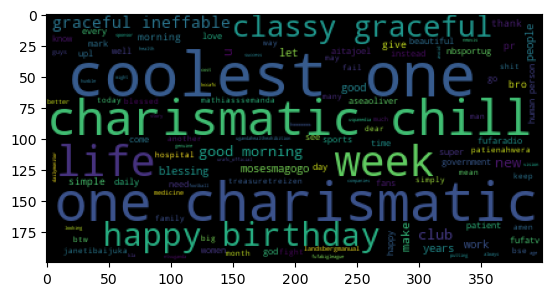

In [94]:
words = " ".join(sum(data['pp'].tolist(),[]))
wordcloud = WordCloud().generate(words)

plt.imshow(wordcloud)
plt.show()

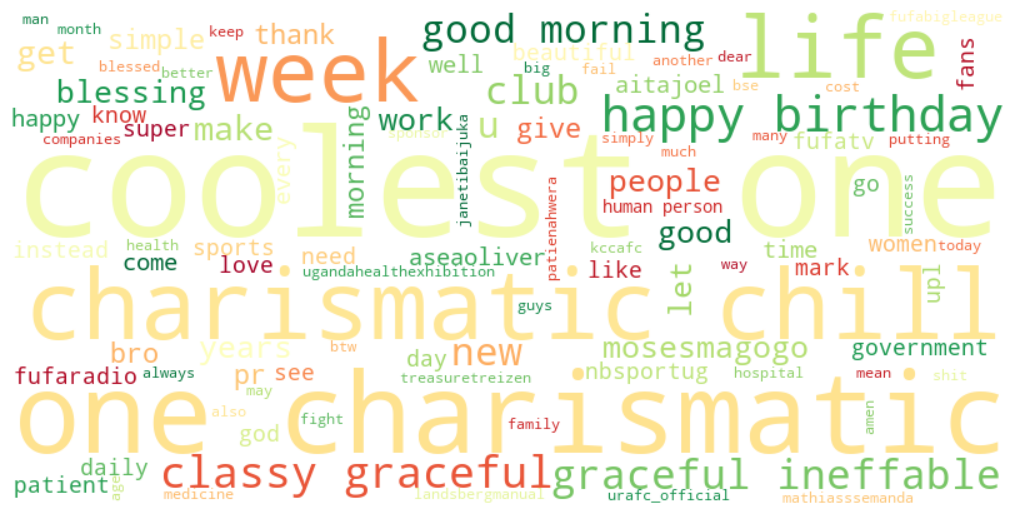

In [96]:
#  https://www.datacamp.com/community/tutorials/wordcloud-python
words = " ".join(sum(data['pp'].tolist(),[]))
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="RdYlGn",
                      stopwords=sw, collocations=True).generate(words) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


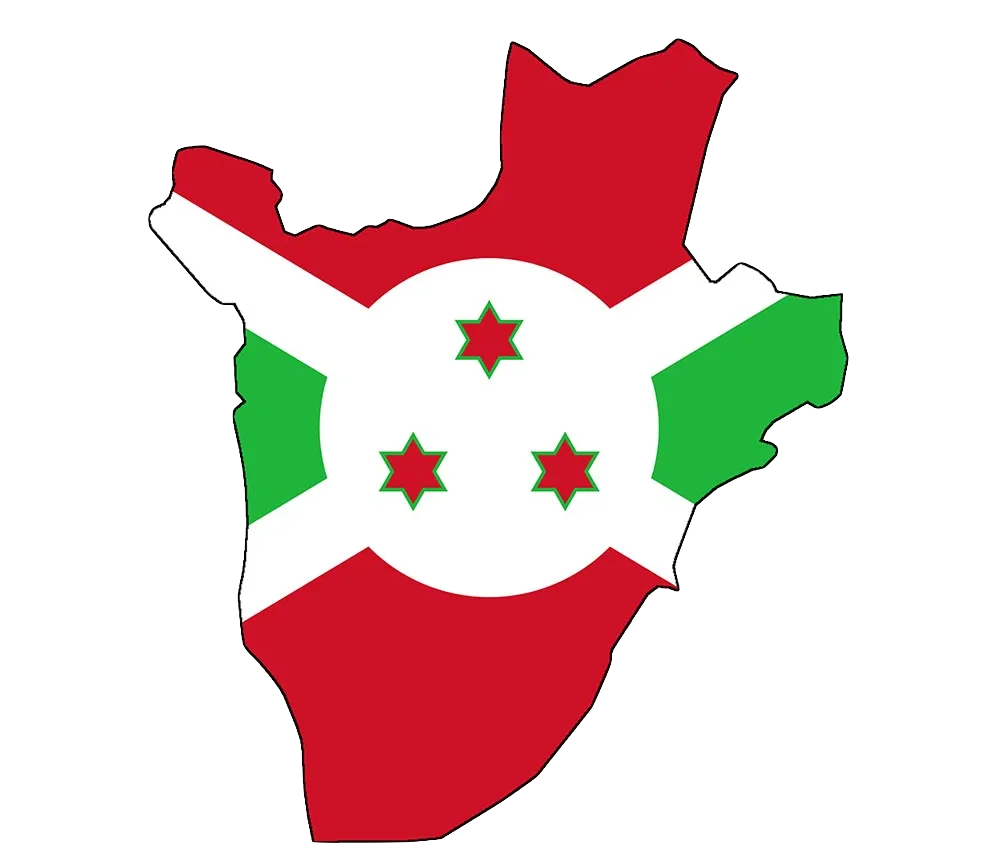

In [97]:
img = PIL.Image.open("img/burundi.png")
display(img)

In [98]:
mask = np.array(img)
mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

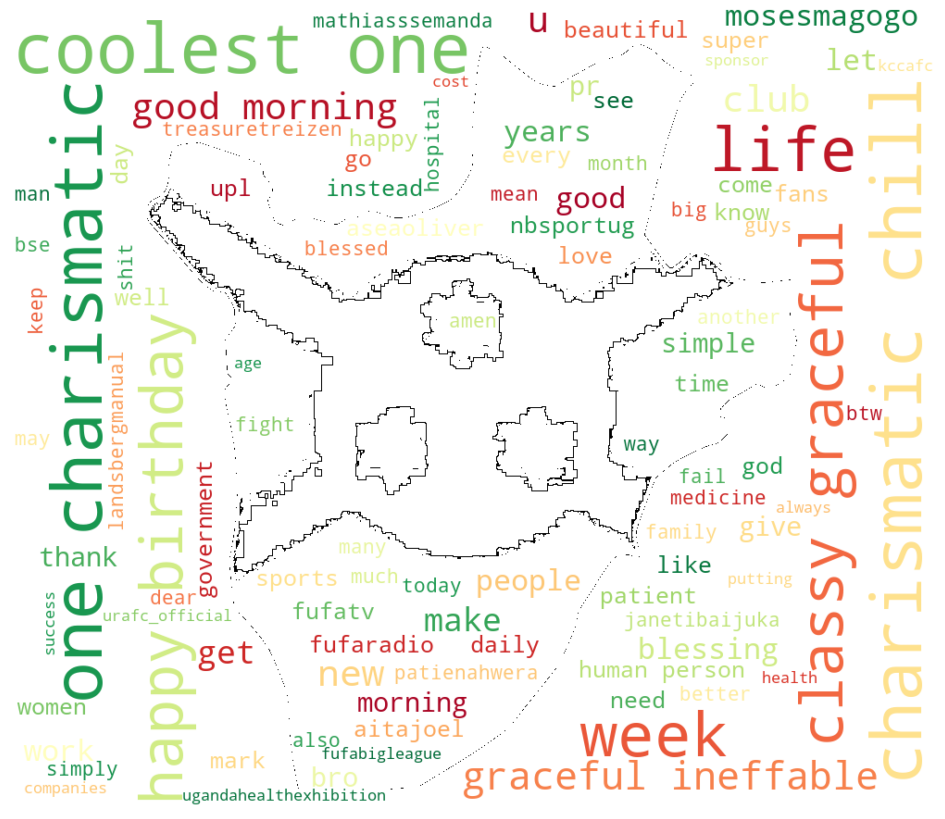

In [99]:
words = " ".join(sum(data['pp'].tolist(),[]))
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="RdYlGn",
                      stopwords=sw, collocations=True,
                      mask=mask, contour_width=1, contour_color='black').generate(words) 

wordcloud.to_file("nlp_bur.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

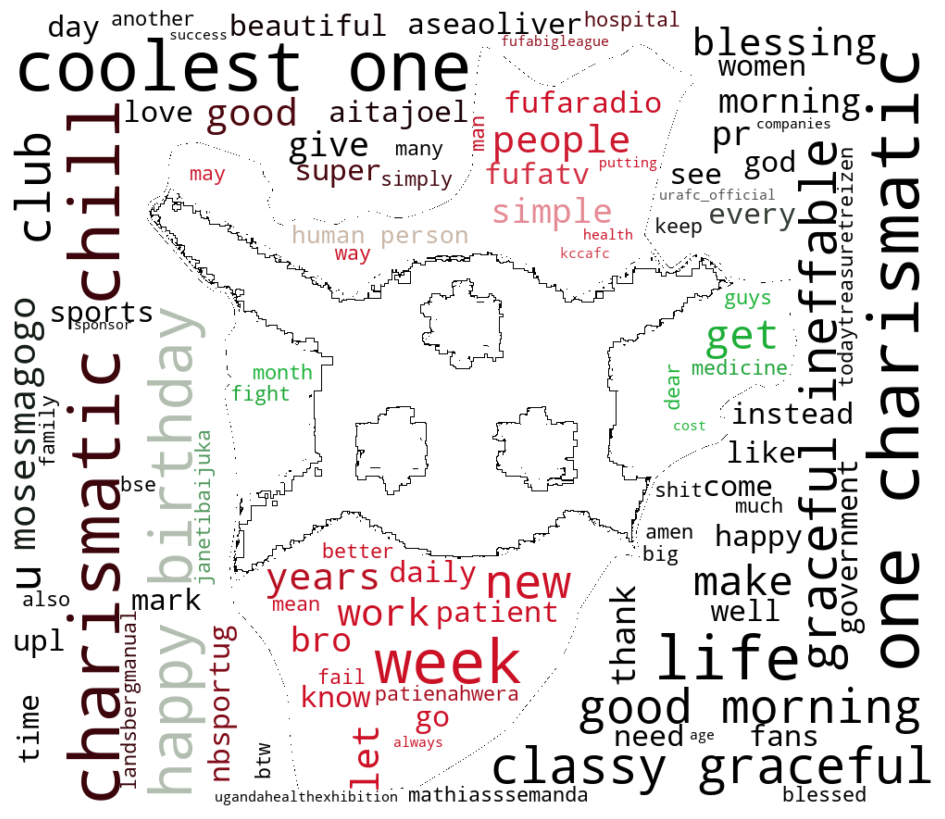

In [100]:
words = " ".join(sum(data['pp'].tolist(),[]))
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="RdYlGn",
                      stopwords=sw, collocations=True,
                      mask=mask, contour_width=1, contour_color='black').generate(words) 

image_colors=ImageColorGenerator(mask)

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# ⏪ Today's recap

- Text pre-processing
- Word Cloud

<center><img src='img/bye.gif' style='height:250px;'></center> 

# Next class: TF-IDF
# See you next Friday!